In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sn
%matplotlib inline
from sklearn.model_selection import GridSearchCV

In [38]:
df = pd.read_csv('train.csv')
df.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1,1


In [39]:
pd.set_option('max_columns', None)
df.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1,1


In [40]:
BTravel = LabelEncoder()
Dept = LabelEncoder()
EField = LabelEncoder()
Gen = LabelEncoder()
JRole = LabelEncoder()
MStatus = LabelEncoder()
OT = LabelEncoder()

In [41]:
df['BusinessTravel_n'] = BTravel.fit_transform(df['BusinessTravel'])
df['Department_n'] = Dept.fit_transform(df['Department'])
df['EducationField_n'] = EField.fit_transform(df['EducationField'])
df['Gender_n'] = Gen.fit_transform(df['Gender'])
df['JobRole_n'] = JRole.fit_transform(df['JobRole'])
df['MaritalStatus_n'] = MStatus.fit_transform(df['MaritalStatus'])
df['OverTime_n'] = OT.fit_transform(df['OverTime'])

In [42]:
df.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,BusinessTravel_n,Department_n,EducationField_n,Gender_n,JobRole_n,MaritalStatus_n,OverTime_n
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4,1,0,1,3,0,2,2,0
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2,1,2,1,1,0,4,1,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5,1,2,2,3,1,7,2,0
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4,1,2,1,1,1,6,2,0
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1,1,2,1,4,1,4,1,0


In [43]:
data = df.drop(['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','EmployeeNumber'], axis = 1)

# Swapping of the columns

In [44]:
col1='Age'
col2='Attrition'
data = data[[col1 if col == col2 else col2 if col == col1 else col for col in data.columns]]

In [45]:
data.head()

,Id,Attrition,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,BusinessTravel_n,Department_n,EducationField_n,Gender_n,JobRole_n,MaritalStatus_n,OverTime_n
0,1,0,30,2,3,3,3,4,2564,0,14,3,0,12,2,11,7,6,7,4,1,0,1,3,0,2,2,0
1,2,0,36,12,4,3,3,3,4663,9,12,3,2,7,2,3,2,1,1,2,1,2,1,1,0,4,1,1
2,3,1,55,2,1,3,3,4,5160,4,16,3,0,12,3,9,7,7,3,5,1,2,2,3,1,7,2,0
3,4,0,39,24,1,1,3,4,4108,7,13,3,0,18,2,7,7,1,7,4,1,2,1,1,1,6,2,0
4,5,0,37,3,3,3,3,3,9434,1,15,3,1,10,2,10,7,7,8,1,1,2,1,4,1,4,1,0


In [46]:
X= data.iloc[:,2:29]
X

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,BusinessTravel_n,Department_n,EducationField_n,Gender_n,JobRole_n,MaritalStatus_n,OverTime_n
0,30,2,3,3,3,4,2564,0,14,3,0,12,2,11,7,6,7,4,1,0,1,3,0,2,2,0
1,36,12,4,3,3,3,4663,9,12,3,2,7,2,3,2,1,1,2,1,2,1,1,0,4,1,1
2,55,2,1,3,3,4,5160,4,16,3,0,12,3,9,7,7,3,5,1,2,2,3,1,7,2,0
3,39,24,1,1,3,4,4108,7,13,3,0,18,2,7,7,1,7,4,1,2,1,1,1,6,2,0
4,37,3,3,3,3,3,9434,1,15,3,1,10,2,10,7,7,8,1,1,2,1,4,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,42,19,3,3,4,3,2759,6,12,3,0,7,2,2,2,2,2,3,1,1,1,3,1,6,0,1
1624,55,2,1,3,3,4,5160,4,16,3,0,12,3,9,7,7,3,5,1,2,2,3,1,7,2,0
1625,25,9,2,1,2,1,4400,3,12,3,0,6,2,3,2,2,2,5,1,2,2,1,1,8,1,0
1626,29,13,3,1,2,1,2335,4,15,3,3,4,3,2,2,2,0,5,1,2,0,0,1,1,0,1


In [47]:
Y= data.iloc[:,1]
Y

0       0
1       0
2       1
3       0
4       0
       ..
1623    1
1624    1
1625    1
1626    1
1627    1
Name: Attrition, Length: 1628, dtype: int64

In [48]:
bestfeatures = SelectKBest(score_func = chi2, k=10)
fit = bestfeatures.fit(X,Y)

In [49]:
datascores = pd.DataFrame(fit.scores_)
datacolumns =pd.DataFrame(X.columns)

In [50]:
featureScores = pd.concat([datacolumns,datascores],axis = 1)
featureScores.columns = ['Details','Score']
featureScores['Score']=featureScores['Score'].apply(lambda x: '%.10f'% x)
featureScores['Score'] = featureScores['Score'].astype(float)

In [51]:
featureScores

,Details,Score
0,Age,165.123023
1,DistanceFromHome,137.566749
2,Education,1.006257
3,EnvironmentSatisfaction,9.721901
4,JobInvolvement,8.489289
5,JobSatisfaction,16.229572
6,MonthlyIncome,306222.899607
7,NumCompaniesWorked,4.629314
8,PercentSalaryHike,0.233338
9,PerformanceRating,0.007049


In [52]:
featureScores.nlargest(19,'Score')

,Details,Score
6,MonthlyIncome,306222.899607
11,TotalWorkingYears,633.002291
13,YearsAtCompany,495.535070
14,YearsInCurrentRole,395.855969
16,YearsWithCurrManager,277.553022
0,Age,165.123023
1,DistanceFromHome,137.566749
25,OverTime_n,103.165751
10,StockOptionLevel,54.136483
23,JobRole_n,34.654573


In [53]:
featureScores.nsmallest(8,'Score')

,Details,Score
18,Behaviour,0.000000
9,PerformanceRating,0.007049
8,PercentSalaryHike,0.233338
19,BusinessTravel_n,0.342754
22,Gender_n,0.381636
2,Education,1.006257
21,EducationField_n,2.841604
20,Department_n,3.864548


In [54]:
newdata = data.drop(['Id','Behaviour','PerformanceRating','PercentSalaryHike','Gender_n','BusinessTravel_n',
                    'Education','EducationField_n','Department_n'], axis = 1)
newdata.head()

,Attrition,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,JobRole_n,MaritalStatus_n,OverTime_n
0,0,30,2,3,3,4,2564,0,0,12,2,11,7,6,7,4,2,2,0
1,0,36,12,3,3,3,4663,9,2,7,2,3,2,1,1,2,4,1,1
2,1,55,2,3,3,4,5160,4,0,12,3,9,7,7,3,5,7,2,0
3,0,39,24,1,3,4,4108,7,0,18,2,7,7,1,7,4,6,2,0
4,0,37,3,3,3,3,9434,1,1,10,2,10,7,7,8,1,4,1,0


In [55]:
newdata.shape

(1628, 19)

# Test Train Split


In [56]:

X_train,X_test,y_train,y_test = train_test_split(newdata.drop('Attrition',axis = 1),newdata['Attrition'],test_size = 0.3,random_state = 1)

# Support Vector Classifier

In [57]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [58]:
svc = SVC(kernel = 'rbf', C = 0.5, gamma = 'scale',random_state = 1, probability = True )
svc.fit(X_train,y_train)
y_predict = svc.predict(X_test)
cn = confusion_matrix(y_test,y_predict)
TP_SVC = cn[1][1]
TN_SVC = cn[0][0]
FP_SVC = cn[0][1]
FN_SVC = cn[1][0]

print("TPR, Senstivity: ",(TP_SVC/(TP_SVC+FN_SVC)))
print("FPR: ",(FP_SVC/(TN_SVC+FP_SVC)))
print("Specivity: ", (TN_SVC/(TN_SVC+FP_SVC)))
print("Accuracy: ",((TP_SVC+TN_SVC)/(TP_SVC+TN_SVC+FP_SVC+FN_SVC)))

TPR, Senstivity:  0.5185185185185185
FPR:  0.3048780487804878
Specivity:  0.6951219512195121
Accuracy:  0.6073619631901841


Text(69.0, 0.5, 'Truth test')

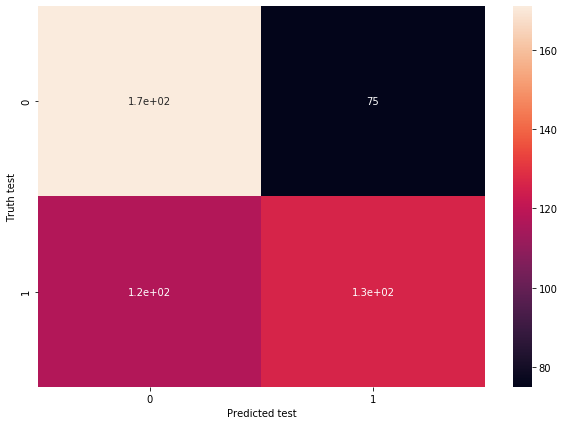

In [59]:
plt.figure(figsize = (10,7))
sn.heatmap(cn, annot = True)
plt.xlabel('Predicted test')
plt.ylabel('Truth test')

In [60]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Attrition,,
0,171,75
1,117,126


In [61]:
svc.predict_proba(X_test)[:,1]

array([0.65484857, 0.68052284, 0.69519405, 0.43306555, 0.29908588,
       0.42070388, 0.4468102 , 0.6621781 , 0.32815731, 0.29860568,
       0.65361168, 0.64677908, 0.59667299, 0.38612682, 0.46846636,
       0.35635114, 0.37053978, 0.34821778, 0.32077737, 0.63795781,
       0.31809528, 0.58140448, 0.32987656, 0.58136245, 0.31954471,
       0.64545791, 0.3065315 , 0.66663902, 0.73908144, 0.65808408,
       0.3133916 , 0.2986485 , 0.59702147, 0.36228771, 0.67461658,
       0.3161826 , 0.64668299, 0.39996013, 0.45012033, 0.35542651,
       0.55888167, 0.33325821, 0.40057616, 0.6229478 , 0.36473418,
       0.67529566, 0.34486082, 0.6765063 , 0.67805088, 0.64295691,
       0.4468102 , 0.41095535, 0.33542273, 0.37333246, 0.6485455 ,
       0.33024483, 0.65699768, 0.62296458, 0.37766205, 0.46596871,
       0.33666568, 0.61343271, 0.40389191, 0.35371686, 0.62826806,
       0.32123916, 0.38616654, 0.33089353, 0.44864738, 0.59527941,
       0.32292106, 0.44198955, 0.32242047, 0.32815731, 0.65361

# Optimising the threshold(SVC)

In [62]:
def predict_threshold(svc,X_test,thresholds):
    import numpy as np
    return np.where(svc.predict_proba(X_test)[:,-1]>thresholds,1,0)

In [63]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1,0.1):
    y_prediction = predict_threshold(svc,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_prediction))

Threshold : 0.0
[[  0 246]
 [  0 243]]
Threshold : 0.1
[[  0 246]
 [  0 243]]
Threshold : 0.2
[[  0 246]
 [  0 243]]
Threshold : 0.30000000000000004
[[ 10 236]
 [  0 243]]
Threshold : 0.4
[[144 102]
 [ 84 159]]
Threshold : 0.5
[[175  71]
 [123 120]]
Threshold : 0.6000000000000001
[[200  46]
 [144  99]]
Threshold : 0.7000000000000001
[[246   0]
 [233  10]]
Threshold : 0.8
[[246   0]
 [243   0]]
Threshold : 0.9
[[246   0]
 [243   0]]


In [64]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Attrition,,
0,171,75
1,117,126


# Plotting the ROC Curve(SVC)

In [65]:
fpr,tpr,thresholds = roc_curve(y_test,svc.predict_proba(X_test)[:,1])

In [66]:
tpr

array([0.        , 0.00411523, 0.01234568, 0.01646091, 0.04115226,
       0.05349794, 0.05349794, 0.0617284 , 0.0617284 , 0.06995885,
       0.06995885, 0.0781893 , 0.0781893 , 0.08230453, 0.09876543,
       0.09876543, 0.10699588, 0.11522634, 0.11522634, 0.11934156,
       0.11934156, 0.13168724, 0.13580247, 0.13580247, 0.14814815,
       0.16460905, 0.16460905, 0.20576132, 0.20576132, 0.218107  ,
       0.218107  , 0.22633745, 0.22633745, 0.2345679 , 0.25102881,
       0.25514403, 0.26748971, 0.26748971, 0.27160494, 0.27983539,
       0.27983539, 0.28806584, 0.28806584, 0.29218107, 0.30452675,
       0.30452675, 0.30864198, 0.30864198, 0.3127572 , 0.3127572 ,
       0.31687243, 0.32510288, 0.32510288, 0.33333333, 0.33333333,
       0.33744856, 0.33744856, 0.34567901, 0.34567901, 0.34979424,
       0.36625514, 0.37037037, 0.37860082, 0.37860082, 0.3909465 ,
       0.3909465 , 0.39917695, 0.40740741, 0.40740741, 0.41563786,
       0.41563786, 0.41975309, 0.41975309, 0.43209877, 0.43209

In [67]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01219512, 0.01219512, 0.01626016, 0.01626016,
       0.0203252 , 0.0203252 , 0.02439024, 0.02439024, 0.02439024,
       0.02845528, 0.02845528, 0.02845528, 0.06097561, 0.06097561,
       0.06910569, 0.06910569, 0.06910569, 0.07723577, 0.07723577,
       0.07723577, 0.08536585, 0.08536585, 0.08943089, 0.08943089,
       0.09349593, 0.09349593, 0.09756098, 0.09756098, 0.09756098,
       0.09756098, 0.09756098, 0.10569106, 0.10569106, 0.10569106,
       0.11382114, 0.11382114, 0.12195122, 0.12195122, 0.12195122,
       0.13414634, 0.13414634, 0.13821138, 0.13821138, 0.1504065 ,
       0.1504065 , 0.1504065 , 0.15853659, 0.15853659, 0.16666667,
       0.16666667, 0.17073171, 0.17073171, 0.17886179, 0.17886179,
       0.17886179, 0.17886179, 0.17886179, 0.18292683, 0.18292683,
       0.18699187, 0.18699187, 0.18699187, 0.20731707, 0.20731707,
       0.2195122 , 0.2195122 , 0.22357724, 0.22357724, 0.23170

In [68]:
thresholds

array([1.76391024, 0.76391024, 0.75911577, 0.73908144, 0.71965343,
       0.69278521, 0.68238447, 0.68154568, 0.68137723, 0.6794544 ,
       0.67941678, 0.67805088, 0.6766363 , 0.6765063 , 0.67492855,
       0.67461658, 0.67196488, 0.66601879, 0.65699768, 0.65537927,
       0.65429006, 0.65361168, 0.65187467, 0.65150132, 0.6514904 ,
       0.64975107, 0.64944658, 0.64696465, 0.64677908, 0.6467438 ,
       0.64671918, 0.64668299, 0.64632683, 0.64573211, 0.64545791,
       0.64460861, 0.64346018, 0.64251215, 0.64001298, 0.63795781,
       0.63489624, 0.63391577, 0.6311219 , 0.62858064, 0.62826806,
       0.62678657, 0.62413906, 0.62296458, 0.6229478 , 0.61883757,
       0.61763669, 0.61749929, 0.61592602, 0.61411508, 0.61353601,
       0.61344674, 0.61343271, 0.61079539, 0.60988069, 0.6078775 ,
       0.60754277, 0.60579654, 0.60570693, 0.60471098, 0.60355796,
       0.60310491, 0.6017291 , 0.601098  , 0.59667299, 0.59527941,
       0.58389746, 0.5833333 , 0.58148671, 0.58140448, 0.57397

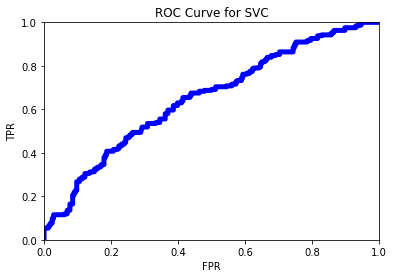

In [69]:
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve for SVC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr,tpr,color = 'blue',lw = '5')
plt.show()

In [70]:
roc_auc_score(y_test,svc.predict_proba(X_test)[:,1])

0.649570075947673

# Decision Tree Classifier

In [71]:
dtc = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
conf = confusion_matrix(y_test,y_pred)
TP_DTC = conf[1][1]
TN_DTC = conf[0][0]
FP_DTC = conf[0][1]
FN_DTC = conf[1][0]

print("TPR, Senstivity: ",(TP_DTC/(TP_DTC+FN_DTC)))
print("FPR: ",(FP_DTC/(TN_DTC+FP_DTC)))
print("Specivity: ", (TN_DTC/(TN_DTC+FP_DTC)))
print("Accuracy: ",((TP_DTC+TN_DTC)/(TP_DTC+TN_DTC+FP_DTC+FN_DTC)))
# END CODE

TPR, Senstivity:  1.0
FPR:  0.13008130081300814
Specivity:  0.8699186991869918
Accuracy:  0.934560327198364


In [72]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Attrition,,
0,214,32
1,0,243


# Optimising the Threshold(Decision Tree Classifier)

In [73]:
def predict_thresh(dtc,X_test,thresha):
    import numpy as np
    return np.where(dtc.predict_proba(X_test)[:,-1]>thresha,1,0)

In [74]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1,0.1):
    y_pre = predict_thresh(dtc,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_pre))

Threshold : 0.0
[[214  32]
 [  0 243]]
Threshold : 0.1
[[214  32]
 [  0 243]]
Threshold : 0.2
[[214  32]
 [  0 243]]
Threshold : 0.30000000000000004
[[214  32]
 [  0 243]]
Threshold : 0.4
[[214  32]
 [  0 243]]
Threshold : 0.5
[[214  32]
 [  0 243]]
Threshold : 0.6000000000000001
[[214  32]
 [  0 243]]
Threshold : 0.7000000000000001
[[214  32]
 [  0 243]]
Threshold : 0.8
[[214  32]
 [  0 243]]
Threshold : 0.9
[[214  32]
 [  0 243]]


In [75]:
fpr1,tpr1,thresha = roc_curve(y_test,dtc.predict_proba(X_test)[:,1])

# Plotting the ROC Curve DTC

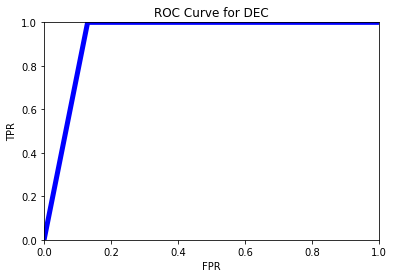

In [76]:
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve for DEC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr1,tpr1,color = 'blue',lw = '5')
plt.show()

In [77]:
roc_auc_score(y_test,dtc.predict_proba(X_test)[:,1])

0.9349593495934959

# Random Forest Classfier

In [78]:
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'gini',random_state = 1 )
rfc.fit(X_train,y_train)
y_pr = rfc.predict(X_test)
con = confusion_matrix(y_test,y_pr)
TP_RFC = con[1][1]
TN_RFC = con[0][0]
FP_RFC = con[0][1]
FN_RFC = con[1][0]

print("TPR, Senstivity: ",(TP_RFC/(TP_RFC+FN_RFC)))
print("FPR: ",(FP_RFC/(TN_RFC+FP_RFC)))
print("Specivity: ", (TN_RFC/(TN_RFC+FP_RFC)))
print("Accuracy: ",((TP_RFC+TN_RFC)/(TP_RFC+TN_RFC+FP_RFC+FN_RFC)))

TPR, Senstivity:  1.0
FPR:  0.04878048780487805
Specivity:  0.9512195121951219
Accuracy:  0.9754601226993865


In [79]:
print(TP_RFC)
print(TN_RFC)
print(FP_RFC)
print(FN_RFC)

243
234
12
0


In [80]:
pd.crosstab(y_test,y_pr)

col_0,0,1
Attrition,,
0,234,12
1,0,243


In [81]:
def predict_thresho(rfc,X_test,thresh):
    import numpy as np
    return np.where(rfc.predict_proba(X_test)[:,-1]>thresh,1,0)

In [82]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1,0.1):
    y_predica = predict_thresho(rfc,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predica))

Threshold : 0.0
[[  0 246]
 [  0 243]]
Threshold : 0.1
[[ 70 176]
 [  0 243]]
Threshold : 0.2
[[137 109]
 [  0 243]]
Threshold : 0.30000000000000004
[[189  57]
 [  0 243]]
Threshold : 0.4
[[218  28]
 [  0 243]]
Threshold : 0.5
[[234  12]
 [  0 243]]
Threshold : 0.6000000000000001
[[242   4]
 [  0 243]]
Threshold : 0.7000000000000001
[[245   1]
 [  4 239]]
Threshold : 0.8
[[246   0]
 [ 16 227]]
Threshold : 0.9
[[246   0]
 [ 41 202]]


In [83]:
fpr2,tpr2,thresh = roc_curve(y_test,rfc.predict_proba(X_test)[:,1])

# Plotting the ROC curve

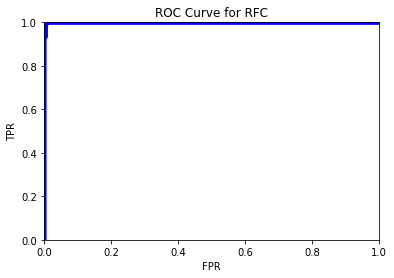

In [84]:
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve for RFC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr2,tpr2,color = 'blue',lw = '5')
plt.show()

In [85]:
roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1])

0.9996988858777477

# Hyperparameter Tuning

In [132]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(RandomForestClassifier(), {
        'n_estimators': [1000,1200,1300,1400,1500]
    
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(X_train, y_train)
pd.DataFrame(rs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.447192,0.693532,0.157612,0.038756,1300,{'n_estimators': 1300},0.929825,0.95614,0.960526,0.942982,0.951542,0.948203,0.010872,2
1,3.848423,0.698389,0.201833,0.015975,1200,{'n_estimators': 1200},0.934211,0.95614,0.956140,0.947368,0.951542,0.949080,0.008121,1


# Testing the data

In [50]:
dft = pd.read_csv('test.csv')
dft.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,3,Research Scientist,4,Married,2070,1,No,23,4,1,5,3,5,2,0,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,4,Sales Executive,4,Divorced,5460,4,No,22,4,2,13,4,7,7,5,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,4,Research Scientist,1,Divorced,5974,4,Yes,13,3,2,13,2,7,7,6,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,2,Manufacturing Director,4,Married,6062,9,Yes,13,3,1,8,4,4,3,0,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,3,Laboratory Technician,2,Married,4447,1,No,12,3,0,9,5,9,7,0,8,2,1


In [51]:
BT = LabelEncoder()
Dt = LabelEncoder()
EF = LabelEncoder()
G = LabelEncoder()
JR = LabelEncoder()
MS = LabelEncoder()
O= LabelEncoder()

In [52]:
dft['BusinessTravel_n'] = BT.fit_transform(dft['BusinessTravel'])
dft['Department_n'] = Dt.fit_transform(dft['Department'])
dft['EducationField_n'] = EF.fit_transform(dft['EducationField'])
dft['Gender_n'] = G.fit_transform(dft['Gender'])
dft['JobRole_n'] = JR.fit_transform(dft['JobRole'])
dft['MaritalStatus_n'] = MS.fit_transform(dft['MaritalStatus'])
dft['OverTime_n'] = O.fit_transform(dft['OverTime'])

In [53]:
dft.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,BusinessTravel_n,Department_n,EducationField_n,Gender_n,JobRole_n,MaritalStatus_n,OverTime_n
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,3,Research Scientist,4,Married,2070,1,No,23,4,1,5,3,5,2,0,4,5,1,2,1,3,1,6,1,0
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,4,Sales Executive,4,Divorced,5460,4,No,22,4,2,13,4,7,7,5,7,3,1,2,2,3,1,7,0,0
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,4,Research Scientist,1,Divorced,5974,4,Yes,13,3,2,13,2,7,7,6,7,4,1,2,1,3,1,6,0,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,2,Manufacturing Director,4,Married,6062,9,Yes,13,3,1,8,4,4,3,0,2,5,1,2,1,1,0,4,1,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,3,Laboratory Technician,2,Married,4447,1,No,12,3,0,9,5,9,7,0,8,2,1,0,1,1,1,2,1,0


In [54]:
Xtest = dft.drop(['Id','Behaviour','PerformanceRating','PercentSalaryHike','Gender_n','BusinessTravel_n',
                     'BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','EmployeeNumber','Education','EducationField_n','Department_n'], axis = 1)
Xtest.head()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,JobRole_n,MaritalStatus_n,OverTime_n
0,28,9,4,3,4,2070,1,1,5,3,5,2,0,4,5,6,1,0
1,31,6,1,4,4,5460,4,2,13,4,7,7,5,7,3,7,0,0
2,37,6,3,4,1,5974,4,2,13,2,7,7,6,7,4,6,0,1
3,42,1,4,2,4,6062,9,1,8,4,4,3,0,2,5,4,1,1
4,45,4,3,3,2,4447,1,0,9,5,9,7,0,8,2,2,1,0


In [55]:
Xtest.shape

(470, 18)

In [56]:
Xtrain = newdata.drop('Attrition',axis = 1)
Xtrain.head()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,JobRole_n,MaritalStatus_n,OverTime_n
0,30,2,3,3,4,2564,0,0,12,2,11,7,6,7,4,2,2,0
1,36,12,3,3,3,4663,9,2,7,2,3,2,1,1,2,4,1,1
2,55,2,3,3,4,5160,4,0,12,3,9,7,7,3,5,7,2,0
3,39,24,1,3,4,4108,7,0,18,2,7,7,1,7,4,6,2,0
4,37,3,3,3,3,9434,1,1,10,2,10,7,7,8,1,4,1,0


In [57]:
Xtrain.shape

(1628, 18)

In [58]:
Ytrain = newdata['Attrition']
Ytrain

0       0
1       0
2       1
3       0
4       0
       ..
1623    1
1624    1
1625    1
1626    1
1627    1
Name: Attrition, Length: 1628, dtype: int64

In [59]:
randfor = RandomForestClassifier(n_estimators = 500, criterion = 'gini',random_state = 1 )
randfor.fit(Xtrain,Ytrain)
ypredict = randfor.predict(Xtest)

In [60]:
ID = dft['Id'].tolist()

In [61]:
final = randfor.predict_proba(Xtest)[:,1]

In [62]:
result = pd.DataFrame(ID)

In [63]:
result[1] = final

In [64]:
result.columns = ['Id','Attrition']

In [65]:
result

,Id,Attrition
0,1,0.084
1,2,0.064
2,3,0.080
3,4,0.186
4,5,0.066
...,...,...
465,466,0.356
466,467,0.810
467,468,0.414
468,469,0.100


In [89]:
res = result.to_csv('Output_Improvedestimators500.csv',index=False)